Eleanor Alarcón Neri - A01665593

Emma Sofia Aparicio Rodriguez - A01666223


---


# **Patterns with K-means**


---



Link to Emma's repo: [emma's github](https://github.com/emmasofiaar/arte_analitica)

Link to Ele's repo: [ele's github](https://github.com/aneleanor/Mastering_Analytics)

In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

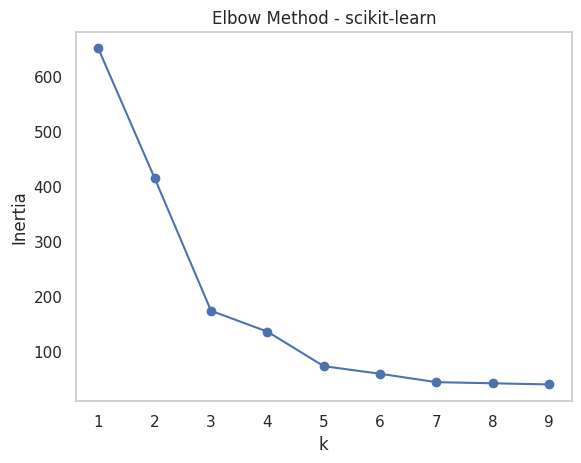


Centros de los clusters (en escala original):
   Reported number of children receiving ART  \
0                                    1948.85   
1                                    4269.09   
2                                   76262.50   

   Estimated number of children needing ART based on WHO methods_median  \
0                                            8160.19                      
1                                            5757.27                      
2                                          126250.00                      

   Estimated number of children needing ART based on WHO methods_min  \
0                                            6310.77                   
1                                            4549.39                   
2                                           97250.00                   

   Estimated number of children needing ART based on WHO methods_max  \
0                                           10124.81                   
1                         

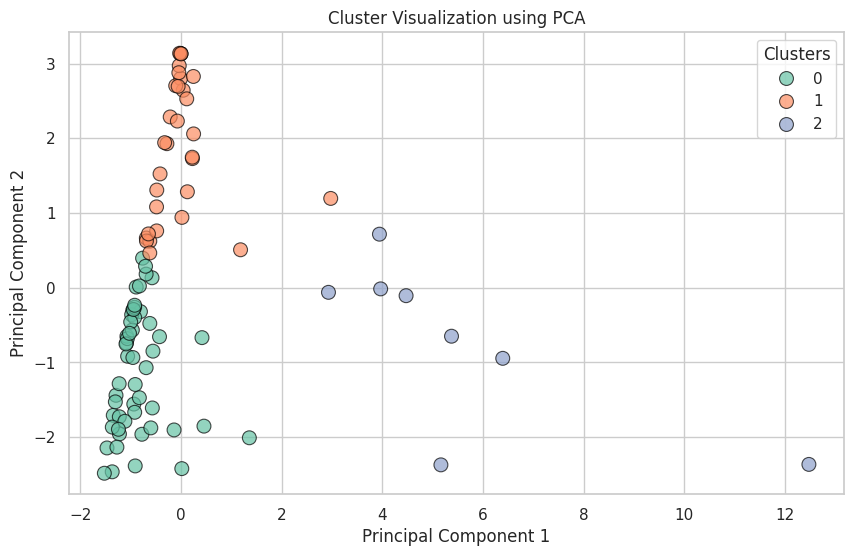

In [ ]:
# read the data
df = pd.read_csv("https://github.com/emmasofiaar/arte_analitica/raw/refs/heads/main/art_pediatric_coverage_by_country_clean.csv")

# Calculate Variabilidad_relativa
df["Variabilidad_relativa"] = ((df["Estimated ART coverage among children (%)_median"] - df["Estimated ART coverage among children (%)_min"]) / df["Estimated ART coverage among children (%)_min"]) * 100

# Drop rows with missing values in Variabilidad_relativa
df_filtered = df.dropna(subset=["Variabilidad_relativa"])

# List of numerical features
features = [
    "Reported number of children receiving ART",
    "Estimated number of children needing ART based on WHO methods_median",
    "Estimated number of children needing ART based on WHO methods_min",
    "Estimated number of children needing ART based on WHO methods_max",
    "Estimated ART coverage among children (%)_median",
    "Estimated ART coverage among children (%)_min",
    "Estimated ART coverage among children (%)_max"
]

# cleaning
df_clean = df_filtered[features].copy()

# cleaning
for col in df_clean.columns:
    df_clean[col] = df_clean[col].astype(str).str.replace(' ', '')  # to remove spaces
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# drop rows with NaN values
df_clean = df_clean.dropna()

# normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# elbow method to find the optimal k
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# plot of the elbow method
plt.plot(range(1, 10), inertia, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method - scikit-learn')
plt.grid()
plt.show()

# set k to the optimal number based on Elbow plot
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=0)
kmeans.fit(X_scaled)

# assign clusters to the data
df_clean['Cluster'] = kmeans.labels_

centers = scaler.inverse_transform(kmeans.cluster_centers_)

centers_df = pd.DataFrame(centers, columns=features)
print("\nCentros de los clusters (en escala original):")
print(centers_df.round(2))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# scatter plot for the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_clean['Cluster'], palette='Set2', s=100, alpha=0.7, edgecolor='black')
plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Clusters')
plt.show()



---


## **Questions**

**Do you think these centers might be representative of the data? Why?**

The cluster centers are representative as they reflect the main grouping patterns in the data.


**How did you obtain the k value to use?**

We determined the optimal number of clusters using the Elbow Method, which analyzes inertia (the sum of squared distances to the closest cluster center). Because of or elbow plot we determined that k = 3 is a good choice for capturing the trends of the data.


**Would the centers be more representative if you used a higher value? A lower value?**

Higher: This could result in finer segmentation, potentially capturing more subtle variations in ART coverage.

Lower: Fewer clusters would simplify the model but may merge certain patterns into other groups.


**How far apart are the centers? Are any very close to others?**

Based on the scatter plot some clusters appear to be well-separated, while others are relatively close. For example, Cluster 1 and Cluster 2 have similar ART coverage medians, suggesting overlap between the ART coverage among children.


**What would happen to the centers if we had many outliers in the box-and-whisker analysis?**

Outliers would likely distort the cluster centers, pulling them away from what the actual central tendency of the data is. For example, if certain countries had extreme ART coverage values, the centroids would shift in that direction, making clusters less representative of the general population.

**What can you say about the data based on the centers?**
The clustering suggests distinct patterns in pediatric ART coverage:
- One cluster shows low ART coverage, indicating regions where intervention might be needed to poll pediatric HIV.
- Another cluster reflects high coverage, likely corresponding to countries with stronger healthcare infrastructures.
- The third cluster represents moderate coverage, probably representing areas that have medium coverage or access to healthcare.


---

